In [1]:
import pandas as pd
import numpy as np
import requests
import json

#functions
import functions as f

In [2]:
# Generate CSV and display first 4 rows.
ticker = ['BTC/USD']
ticker_eth = 'ETH/USD'

for i in ticker:
    data = f.fetch_daily_data(i)
    
df = pd.read_csv(data)
df_firstn = pd.read_csv(data, nrows=5)

df_firstn

,unix,low,high,open,close,volume,date,vol_fiat,ticker
0,1649203200,44411.00,45523.25,45509.92,45352.77,4574.281994,2022-04-06,2.074564e+08,BTC-USD
1,1649116800,45371.16,47200.00,46594.39,45506.50,14390.573085,2022-04-05,6.548646e+08,BTC-USD
2,1649030400,45129.93,46900.00,46420.08,46596.83,13802.441117,2022-04-04,6.431500e+08,BTC-USD
3,1648944000,45552.07,47469.40,45826.24,46422.16,8773.771859,2022-04-03,4.072974e+08,BTC-USD
4,1648857600,45642.89,47219.46,46296.36,45826.27,8380.142744,2022-04-02,3.840307e+08,BTC-USD


In [3]:
# Pivot by monthly high and low

df['month'] = pd.to_datetime(df['date']).dt.strftime('%B') # make a month column to preserve the order
df['year'] = pd.to_datetime(df['date']).dt.strftime('%Y') # make a month column to preserve the order
pivot = pd.pivot_table(df, values=['high','low'], index=['month','year','crypto'],aggfunc=np.average)
pivot = pivot.sort_values(by=['month','year'], ascending = [True, True])
pivot

,,,high,low
month,year,crypto,,
April,2022,BTC,46841.891667,45056.651667
August,2021,BTC,46741.993548,44380.928710
December,2021,BTC,50801.412258,47982.784839
February,2022,BTC,41851.113214,39518.250000
January,2022,BTC,42161.954194,40013.277419
July,2021,BTC,35217.746129,33364.951290
June,2021,BTC,36905.322500,34104.701000
March,2022,BTC,42903.773226,40985.078065
November,2021,BTC,62092.513333,59153.357000


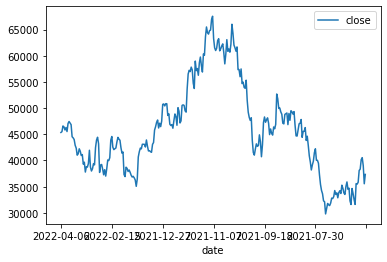

In [4]:
from matplotlib import pyplot
series = pd.read_csv(data, index_col=['date'], usecols=['date','close'])

series.plot()
pyplot.show()